In [2]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

In [3]:
bs = 64
img_size = 128

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

In [4]:
dataset = image_dataset_from_directory(
    'sign_digits_dataset',
    batch_size = bs,
    seed = 42,
    image_size = (img_size,img_size)
)

Found 2062 files belonging to 10 classes.


In [5]:
dataset_size = len(dataset)
train_size = int(train_ratio*dataset_size)
val_size = int(val_ratio*dataset_size)
test_size = int(test_ratio*dataset_size)

train_ds = dataset.take(train_size)
remaining_ds = dataset.skip(train_size)
val_ds = remaining_ds.take(val_size)
test_ds = remaining_ds.skip(val_size)

print("Length of dataset: ",len(dataset))
print("Length of training set: ",len(train_ds))
print("Length of validation set: ",len(val_ds))
print("Length of testing set: ",len(test_ds))

Length of dataset:  33
Length of training set:  23
Length of validation set:  4
Length of testing set:  6


In [6]:
dataset.class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

[[[166.      164.      143.     ]
  [164.65625 162.65625 141.65625]
  [160.82812 159.28125 138.28125]
  ...
  [152.34375 150.89062 150.25   ]
  [144.35938 143.35938 141.35938]
  [141.      140.      138.     ]]

 [[165.32812 162.65625 143.     ]
  [166.24146 163.56958 143.91333]
  [164.42896 162.51465 142.55396]
  ...
  [153.44604 152.96924 153.36792]
  [145.49316 145.16504 144.50879]
  [140.32812 140.      139.34375]]

 [[165.      162.      143.90625]
  [167.32007 164.32007 146.22632]
  [167.66724 165.57349 147.02661]
  ...
  [155.35083 154.1543  153.49585]
  [148.92847 147.11597 145.75659]
  [141.35938 139.54688 138.1875 ]]

 ...

 [[140.      137.      132.     ]
  [146.35132 142.67944 139.0232 ]
  [150.15405 147.51343 144.96655]
  ...
  [141.45312 142.45312 146.45312]
  [141.45312 142.45312 146.45312]
  [141.45312 142.45312 146.45312]]

 [[139.01562 136.67188 131.67188]
  [145.28296 142.4878  138.61108]
  [149.39868 147.29639 144.57007]
  ...
  [141.      141.34375 145.67188]
  [1

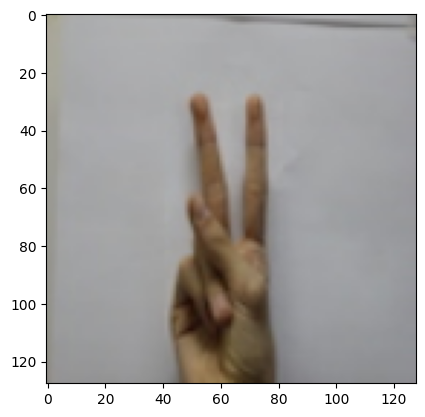

In [7]:
for image_batch,label_batch in train_ds.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print(image_batch[0].numpy())

In [8]:
from tensorflow.keras.applications import MobileNet

num_classes = len(dataset.class_names)
def pretrained():
    base_model = MobileNet(include_top = False, weights = 'imagenet', input_shape = (128,128,3))
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128,activation = 'relu'),
        layers.Dense(64,activation = 'relu'),
        layers.Dense(num_classes,activation = 'sigmoid')
    ])

    return model

model = pretrained()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 3,368,970
Trainable params: 140,106
Non-tr

In [9]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

model_history_MobileNet= model.fit(train_ds, validation_data=val_ds, epochs = 10)

Epoch 1/10
23/23 [==============================] - 20s 218ms/step - loss: 2.0778 - accuracy: 0.2670 - val_loss: 1.5986 - val_accuracy: 0.4648
Epoch 2/10
23/23 [==============================] - 2s 90ms/step - loss: 1.3583 - accuracy: 0.5292 - val_loss: 1.1774 - val_accuracy: 0.6094
Epoch 3/10
23/23 [==============================] - 2s 92ms/step - loss: 0.9359 - accuracy: 0.7065 - val_loss: 0.8129 - val_accuracy: 0.7461
Epoch 4/10
23/23 [==============================] - 2s 91ms/step - loss: 0.7248 - accuracy: 0.7615 - val_loss: 0.7230 - val_accuracy: 0.7852
Epoch 5/10
23/23 [==============================] - 2s 90ms/step - loss: 0.6077 - accuracy: 0.8084 - val_loss: 0.6679 - val_accuracy: 0.7617
Epoch 6/10
23/23 [==============================] - 2s 91ms/step - loss: 0.5047 - accuracy: 0.8370 - val_loss: 0.6609 - val_accuracy: 0.8047
Epoch 7/10
23/23 [==============================] - 2s 93ms/step - loss: 0.4393 - accuracy: 0.8628 - val_loss: 0.6054 - val_accuracy: 0.8203
Epoch 8/10


In [10]:
model.evaluate(test_ds)

6/6 [==============================] - 1s 39ms/step - loss: 0.4703 - accuracy: 0.8473


[0.4703103303909302, 0.847305417060852]

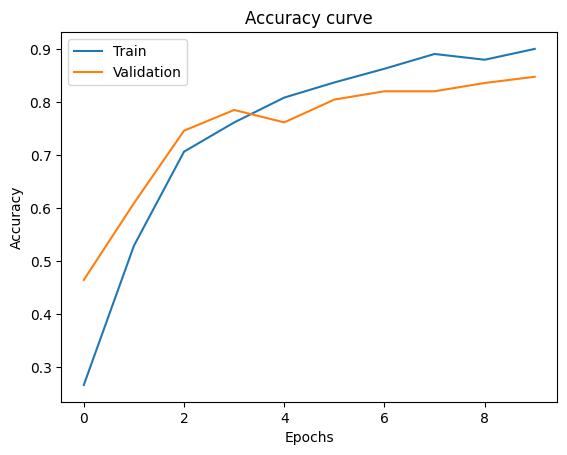

In [11]:
plt.plot(model_history_MobileNet.history['accuracy'])
plt.plot(model_history_MobileNet.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy curve")
plt.legend(['Train','Validation'])


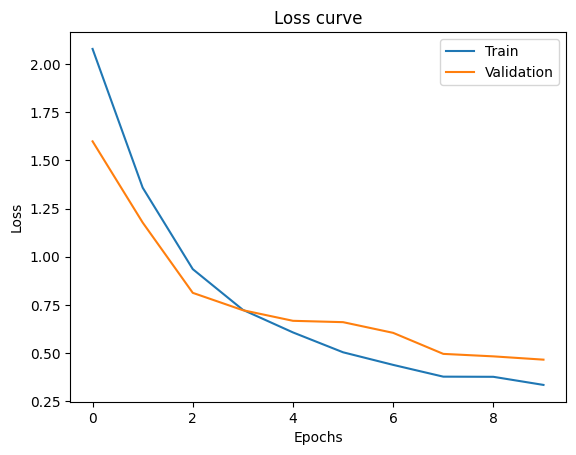

In [12]:
plt.plot(model_history_MobileNet.history['loss'])
plt.plot(model_history_MobileNet.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss curve")
plt.legend(['Train','Validation'])


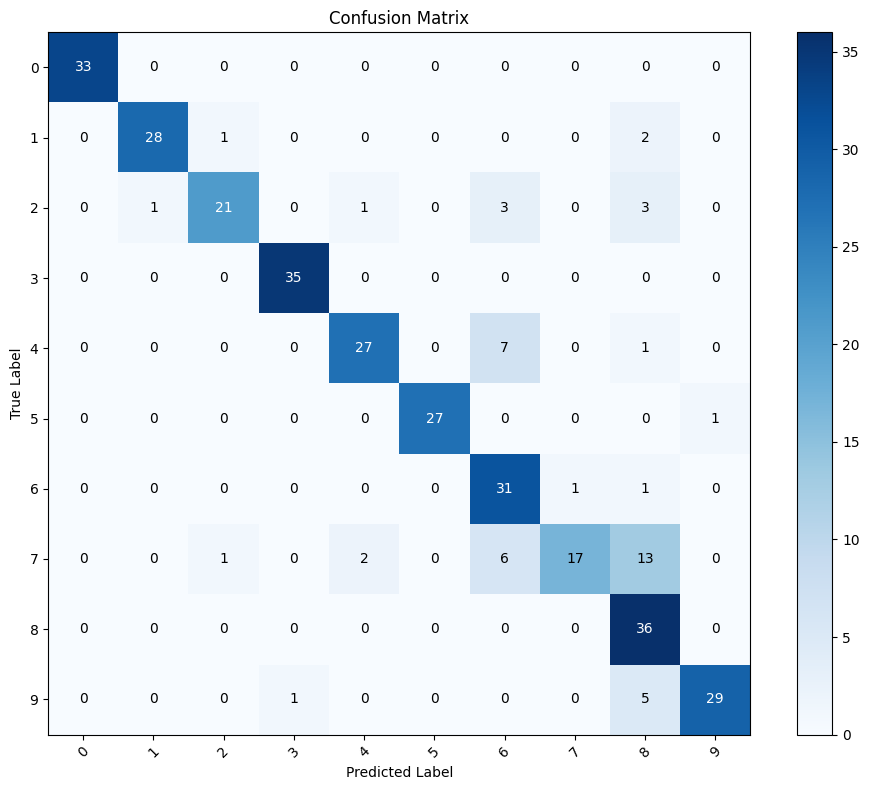

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true=[]
y_pred=[]

for images,labels in test_ds:
    predictions=model.predict(images, verbose=0)
    predicted_labels=tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())
    
cm=confusion_matrix(y_true,y_pred,labels=range(10))
class_names=dataset.class_names

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
# Add labels to each cell
thresh = cm.max() / 2.
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(cm[i, j], 'd'),
        ha="center", va="center",
        color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

In [14]:
from tensorflow.keras.applications import VGG16

num_classes = len(dataset.class_names)
def pretrained():
    base_model = VGG16(include_top = False, weights = 'imagenet', input_shape = (128,128,3))
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128,activation = 'relu'),
        layers.Dense(64,activation = 'relu'),
        layers.Dense(num_classes,activation = 'sigmoid')
    ])

    return model

model = pretrained()

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,789,258
Trainable params: 74,570
Non-trainable params: 14,714,688
_____________________________________

In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

model_history_VGG16= model.fit(train_ds, validation_data=val_ds, epochs = 10)

Epoch 1/10


23/23 [==============================] - 15s 321ms/step - loss: 2.2225 - accuracy: 0.3906 - val_loss: 0.9036 - val_accuracy: 0.6758
Epoch 2/10
23/23 [==============================] - 7s 308ms/step - loss: 0.7804 - accuracy: 0.7364 - val_loss: 0.5973 - val_accuracy: 0.7773
Epoch 3/10
23/23 [==============================] - 7s 306ms/step - loss: 0.4692 - accuracy: 0.8444 - val_loss: 0.4403 - val_accuracy: 0.8789
Epoch 4/10
23/23 [==============================] - 7s 307ms/step - loss: 0.2980 - accuracy: 0.9171 - val_loss: 0.3745 - val_accuracy: 0.8672
Epoch 5/10
23/23 [==============================] - 7s 304ms/step - loss: 0.2233 - accuracy: 0.9348 - val_loss: 0.2636 - val_accuracy: 0.9336
Epoch 6/10
23/23 [==============================] - 7s 299ms/step - loss: 0.1801 - accuracy: 0.9524 - val_loss: 0.1965 - val_accuracy: 0.9414
Epoch 7/10
23/23 [==============================] - 7s 306ms/step - loss: 0.1544 - accuracy: 0.9647 - val_loss: 0.2286 - val_accuracy: 0.9180
Epoch 8/10
23/23

In [16]:
model.evaluate(test_ds)

6/6 [==============================] - 5s 691ms/step - loss: 0.1548 - accuracy: 0.9671


[0.15481802821159363, 0.9670658707618713]

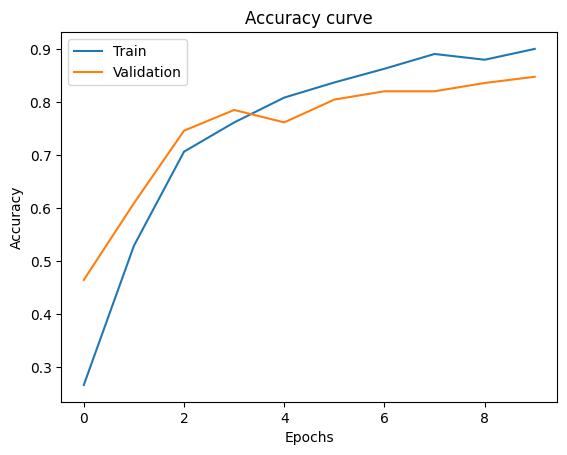

In [17]:
plt.plot(model_history_MobileNet.history['accuracy'])
plt.plot(model_history_MobileNet.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy curve")
plt.legend(['Train','Validation'])


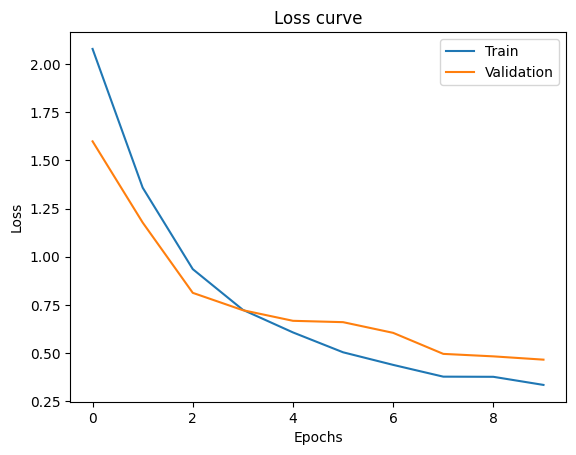

In [18]:
plt.plot(model_history_MobileNet.history['loss'])
plt.plot(model_history_MobileNet.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss curve")
plt.legend(['Train','Validation'])


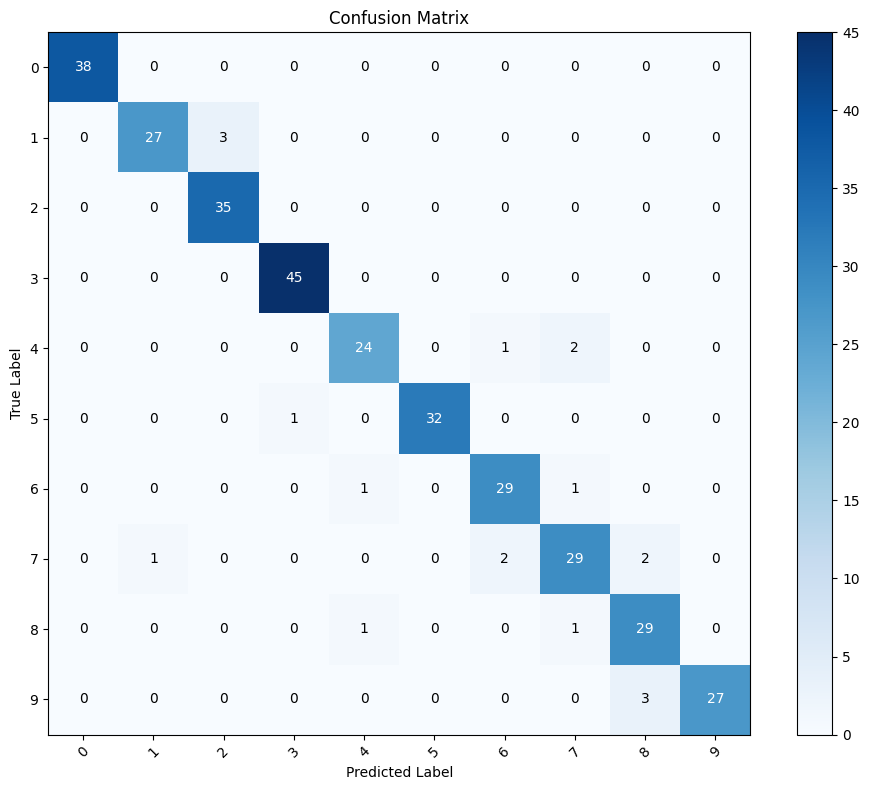

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true=[]
y_pred=[]

for images,labels in test_ds:
    predictions=model.predict(images, verbose=0)
    predicted_labels=tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())
    
cm=confusion_matrix(y_true,y_pred,labels=range(10))
class_names=dataset.class_names

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
# Add labels to each cell
thresh = cm.max() / 2.
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(cm[i, j], 'd'),
        ha="center", va="center",
        color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()